In [1]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:

df=pd.read_csv('winequality-red.csv',sep=';')

In [3]:
#checking for nulls

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
df=df.drop_duplicates()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   float64
dtypes: float64(12)
memory usage: 138.0 KB


In [27]:
df.reset_index(drop=True, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   float64
dtypes: float64(12)
memory usage: 127.5 KB


In [30]:
# Split the dataset using “train-test-split” function.
#linear regression
# Apply KNN on “quality” column of the dataset. Select the appropriate features
#Predict on the test set.
#Find out the accuracy.

In [31]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 28 to 792
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         951 non-null    float64
 1   volatile acidity      951 non-null    float64
 2   citric acid           951 non-null    float64
 3   residual sugar        951 non-null    float64
 4   chlorides             951 non-null    float64
 5   free sulfur dioxide   951 non-null    float64
 6   total sulfur dioxide  951 non-null    float64
 7   density               951 non-null    float64
 8   pH                    951 non-null    float64
 9   sulphates             951 non-null    float64
 10  alcohol               951 non-null    float64
 11  quality               951 non-null    float64
dtypes: float64(12)
memory usage: 96.6 KB


In [33]:
df_train.shape

(951, 12)

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 1335 to 585
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         408 non-null    float64
 1   volatile acidity      408 non-null    float64
 2   citric acid           408 non-null    float64
 3   residual sugar        408 non-null    float64
 4   chlorides             408 non-null    float64
 5   free sulfur dioxide   408 non-null    float64
 6   total sulfur dioxide  408 non-null    float64
 7   density               408 non-null    float64
 8   pH                    408 non-null    float64
 9   sulphates             408 non-null    float64
 10  alcohol               408 non-null    float64
 11  quality               408 non-null    float64
dtypes: float64(12)
memory usage: 41.4 KB


In [35]:
df_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

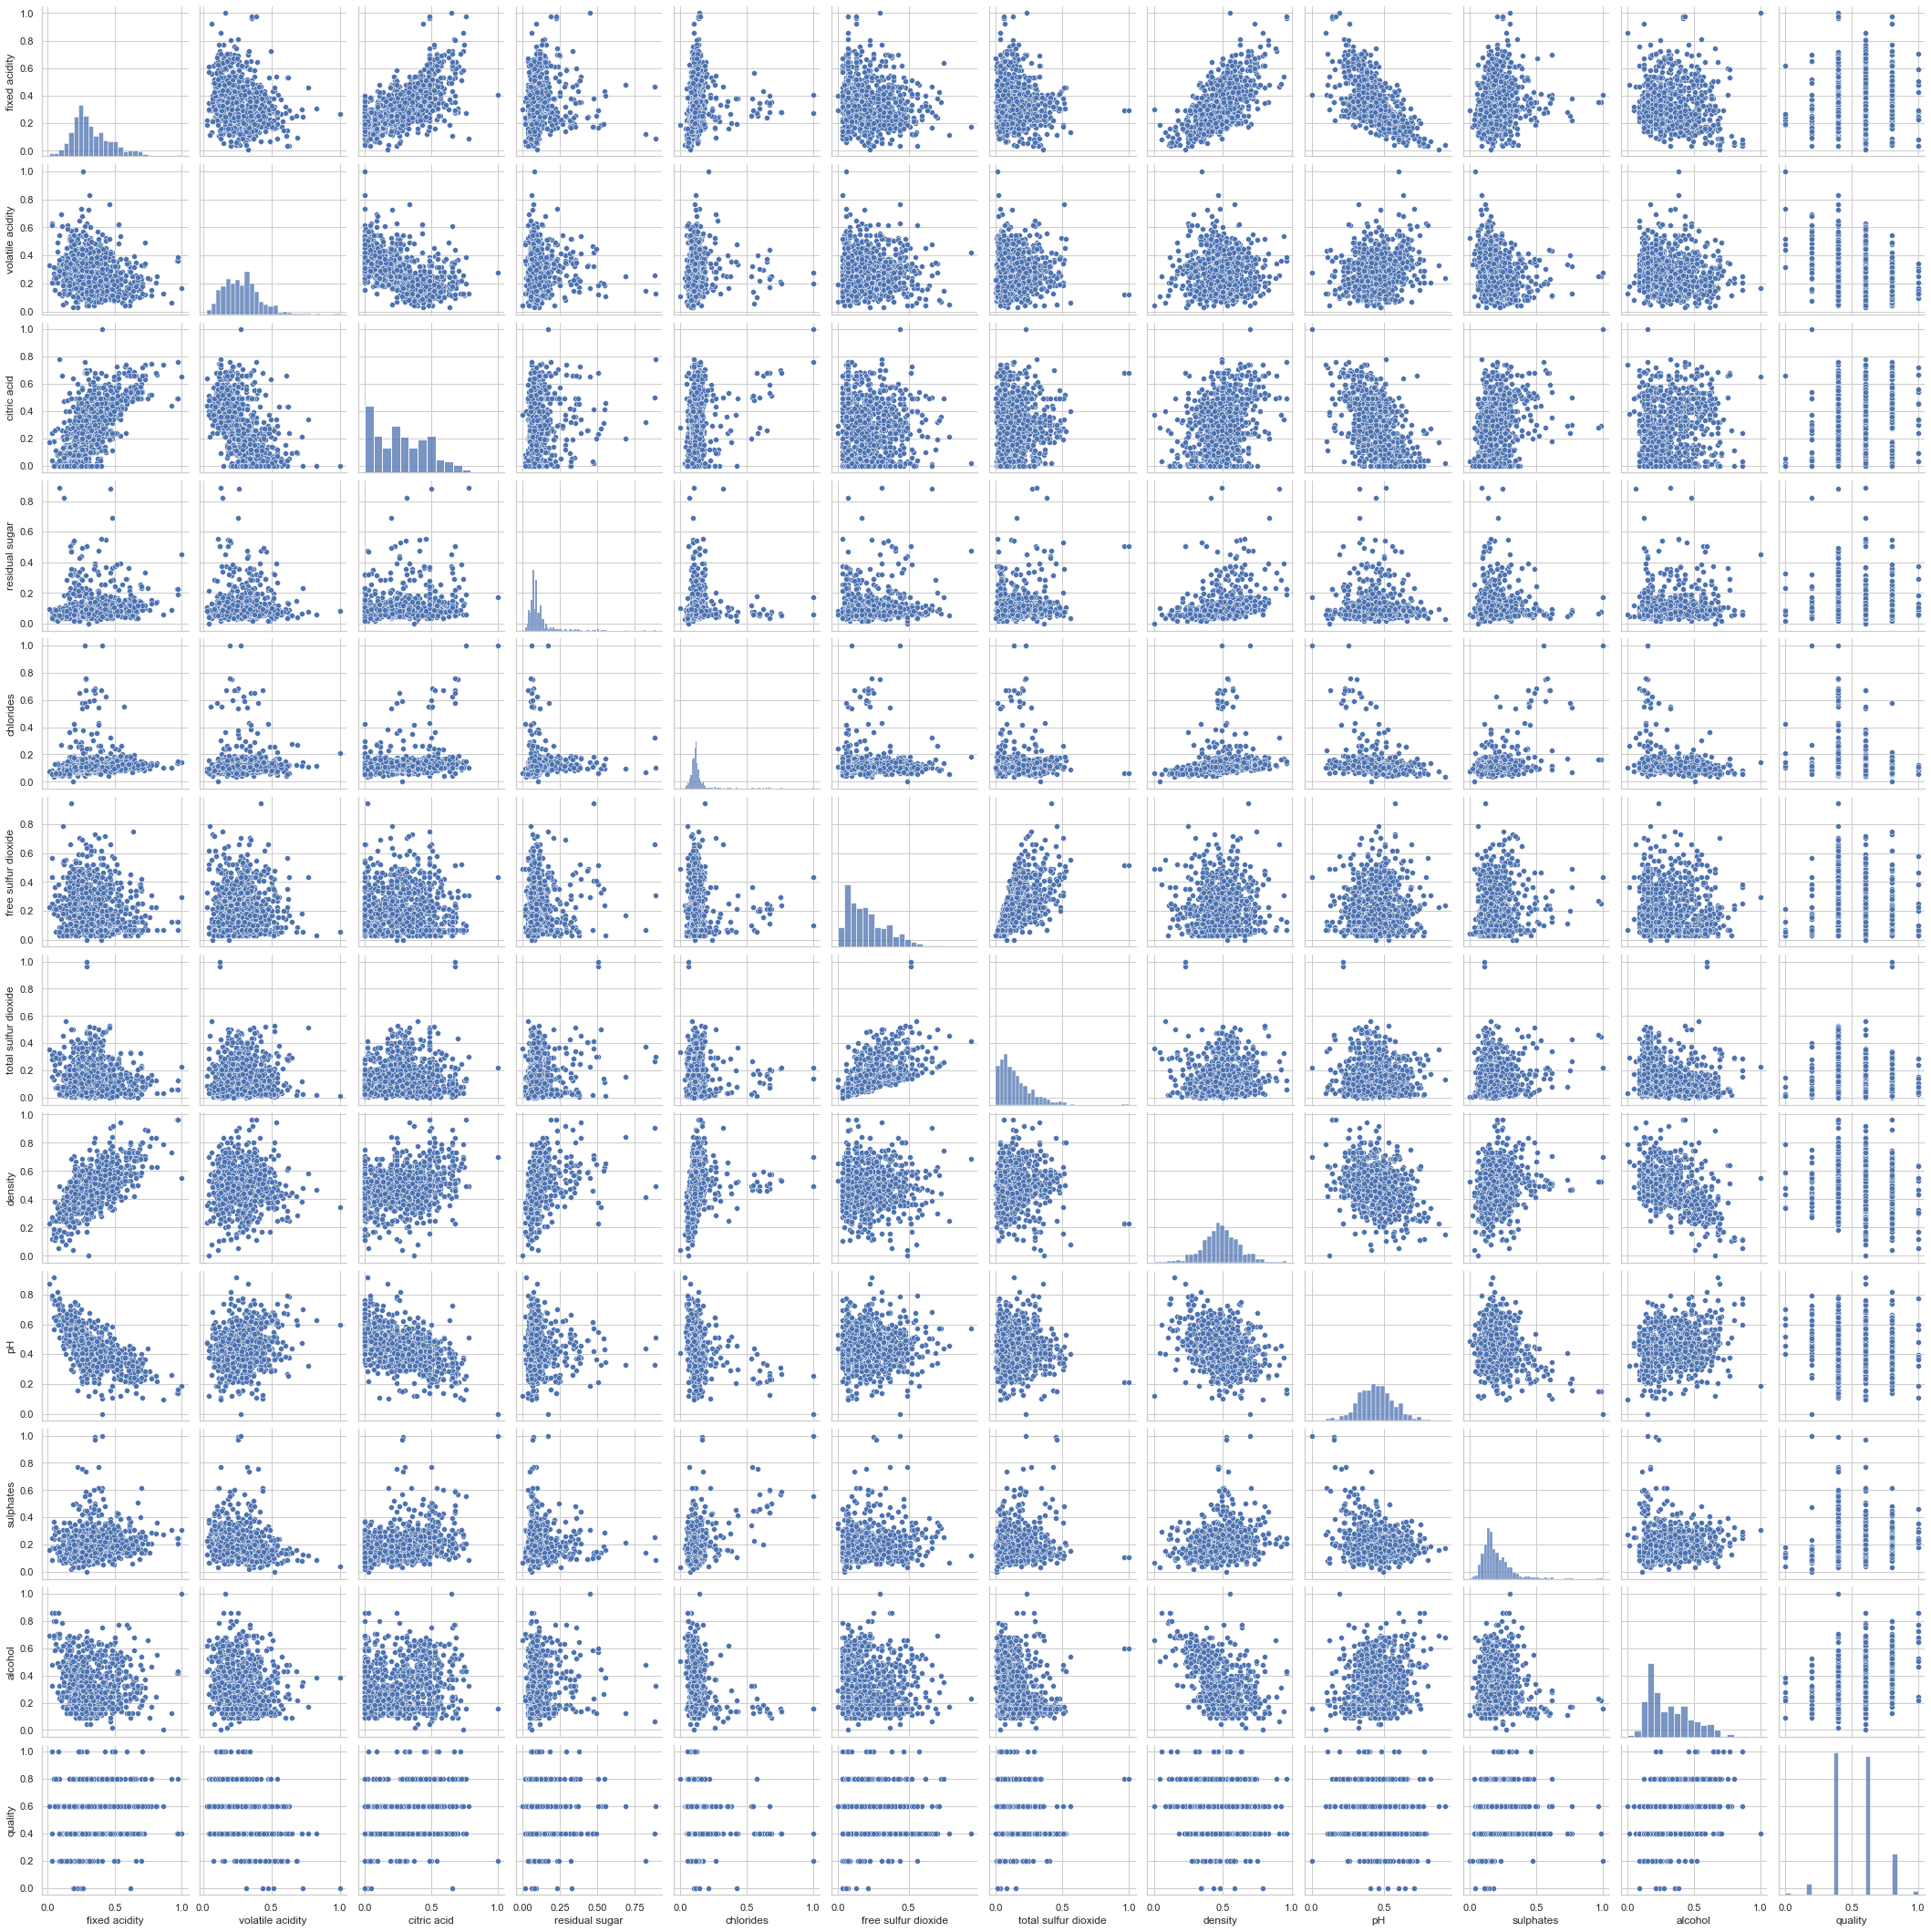

In [36]:
sns.pairplot(df_train) 
plt.show()

In [37]:
#correlation matrix 

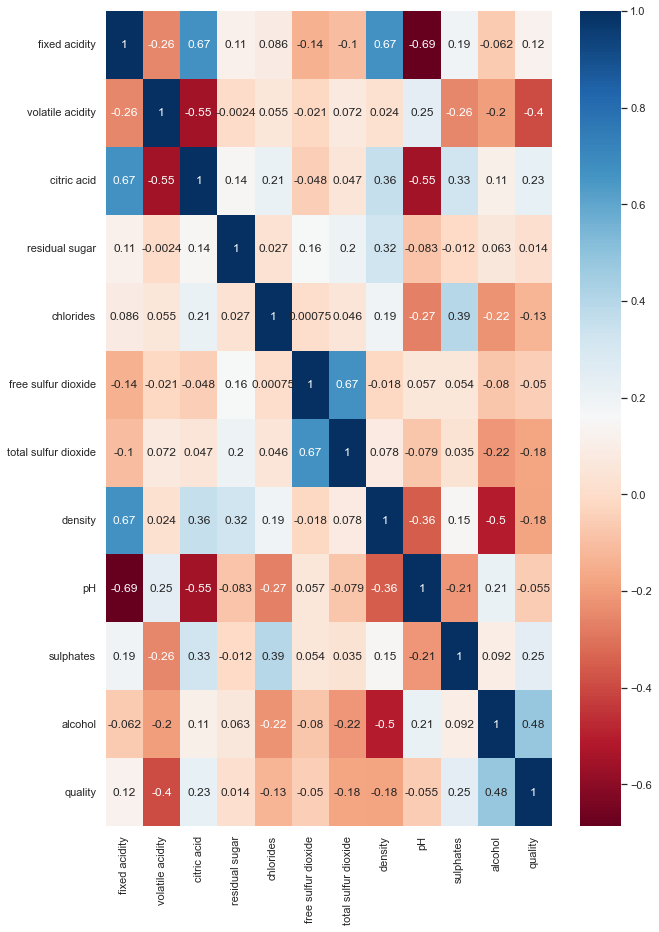

In [38]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(), annot=True,cmap='RdBu')
plt.show()

In [39]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [40]:
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [41]:
#rescale the data frame
from sklearn import preprocessing 
min_max=preprocessing.MinMaxScaler()
df[columns]= min_max.fit_transform(df[columns])

In [42]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,0.328371,0.280464,0.272333,0.111192,0.127085,0.209765,0.144261,0.487441,0.448651,0.196829,0.312664,0.524650
std,0.153716,0.125364,0.195537,0.092624,0.082432,0.147145,0.118053,0.137219,0.122076,0.102196,0.166472,0.164716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.486784,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.430000,0.116438,0.131886,0.281690,0.201413,0.569016,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
#input values x and y

X = df.drop(columns=['fixed acidity'])
y = df['fixed acidity']  

In [70]:
X_train, X_test,y_train,y_test=train_test_split(X,y)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_prediction=regressor.predict(X_test)

In [73]:
print('Linear Regression Score is %s'%regressor.score(X_test,y_test))

Linear Regression Score is 0.8695689716660702


In [43]:
def log_transform(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

In [45]:
#create a copy of the column 

citric=list(map(log_transform,X['citric acid']))

KeyError: 'citric acid'

In [69]:
index = df[(df['density'] >= 0.99914)|(df['density'] <= 0.9945592)].index
df.drop(index, inplace=True)
df['density'].describe()

count    1277.000000
mean        0.996732
std         0.001118
min         0.994560
25%         0.995860
50%         0.996750
75%         0.997600
max         0.999100
Name: density, dtype: float64

In [68]:
print(df['density'].quantile(0.10))
print(df['density'].quantile(0.90))

0.9945592
0.99914


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1277 non-null   float64
 1   volatile acidity      1277 non-null   float64
 2   citric acid           1277 non-null   float64
 3   residual sugar        1277 non-null   float64
 4   chlorides             1277 non-null   float64
 5   free sulfur dioxide   1277 non-null   float64
 6   total sulfur dioxide  1277 non-null   float64
 7   density               1277 non-null   float64
 8   pH                    1277 non-null   float64
 9   sulphates             1277 non-null   float64
 10  alcohol               1277 non-null   float64
 11  quality               1277 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 129.7 KB


In [60]:
df["density"] = np.where(df["density"] <0.994556, 0.994556,df['density'])
df["density"] = np.where(df["density"] >0.99914, 0.99914,df['density'])
print(df['density'].skew())

0.102068105402493


In [62]:
print(df['pH'].quantile(0.10))
print(df['pH'].quantile(0.90))

3.12
3.51


In [63]:
df["pH"] = np.where(df["pH"] <3.12, 3.12,df['pH'])
df["pH"] = np.where(df["pH"] >3.51, 3.51,df['pH'])
print(df['pH'].skew())

0.04943367853959553


In [67]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
print(df['pH'].quantile(0.10))
print(df['pH'].quantile(0.90))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996758,3.310269,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001435,0.122706,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.994556,3.120000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,0.999140,3.510000,2.000000,14.900000,8.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
attributes = ['density','alcohol','volatile acidity','pH','chlorides']  #input values

X = df[attributes]
y = df['quality']  

In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
X_train, X_test,y_train,y_test=train_test_split(X,y)

In [22]:

from sklearn.linear_model import LinearRegression

In [23]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_prediction=regressor.predict(X_test)

In [24]:
print('Linear Regression Score is %s'%regressor.score(X_test,y_test))

Linear Regression Score is 0.29874519127435584
